In [1]:
import numpy as np
import pandas as pd
import imblearn
import optuna

In [2]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) #to make things look a little prettier

In [3]:
# Libraries to split data, and process data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
# import tensorflow, keras and it's models and layers. Also import keras tuner and Random Search
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [5]:
# import libraries to help evaluate our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [6]:
df = pd.read_csv('merge.csv') # read data from csv file
df # Look at head and tail of data

,id patient,Jitter (local),Jitter (local absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local dB),Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160.0,159.0,0.006065,0.000416,0.000,0.0,0.000,23.0,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170.0,169.0,0.005181,0.000403,2.247,0.0,0.000,23.0,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431.0,1427.0,0.006071,0.000474,10.656,1.0,0.178,23.0,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94.0,92.0,0.004910,0.000320,0.000,0.0,0.000,23.0,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117.0,114.0,0.004757,0.000380,18.182,1.0,13.318,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,68,0.257,0.000018,0.105,0.122,0.315,5.665,0.544,2.612,3.390,...,153.180,137.0,136.0,0.007143,0.000407,0.000,0.0,0.000,0.0,1
1204,68,0.311,0.000021,0.129,0.148,0.388,5.492,0.536,2.422,2.959,...,163.571,144.0,143.0,0.006852,0.000619,0.000,0.0,0.000,0.0,1
1205,68,0.434,0.000029,0.178,0.229,0.534,5.048,0.549,2.284,3.082,...,169.648,145.0,144.0,0.006785,0.000768,0.000,0.0,0.000,0.0,1
1206,68,0.464,0.000031,0.195,0.227,0.585,4.739,0.536,2.144,2.940,...,170.945,149.0,148.0,0.006608,0.000834,0.000,0.0,0.000,0.0,1


In [7]:
df_original = df.copy()
#df.drop(['id patient','Jitter (local)','Jitter (local absolute)', 'Jitter (ppq5)',
 #        'Jitter (ddp)','Shimmer (local)','Shimmer (local dB)','Shimmer (apq3)','Shimmer (apq11)',
  #       'Shimmer (dda)','AC','NTH','HTN','Median pitch','Mean pitch','Standard deviation',
   #      'Number of pulses','Number of periods','Mean period',
    #     'Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks',
     #    'Degree of voice breaks','UPDRS',], inplace=True, axis=1)
df.drop(['id patient','Jitter (local)', 'Jitter (ppq5)',
         'Jitter (ddp)','Shimmer (local dB)','Shimmer (apq3)','Shimmer (apq11)',
         'Shimmer (dda)','AC','NTH','HTN','Median pitch','Standard deviation',
         'Number of pulses','Number of periods','Mean period',
         'Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks',
         'Degree of voice breaks','UPDRS',], inplace=True, axis=1)

#df.drop(['id patient', 'Jitter (ppq5)',
 #        'Jitter (ddp)','Shimmer (local dB)','Shimmer (apq3)','Shimmer (apq11)',
  #       'Shimmer (dda)','AC','NTH','Median pitch','Standard deviation',
   #      'Number of pulses','Number of periods','Mean period',
    #     'Standard deviation of period','Fraction of locally unvoiced frames','Number of voice breaks',
     #    'Degree of voice breaks','UPDRS',], inplace=True, axis=1)        
        
        
df.head()

,Jitter (local absolute),Jitter (rap),Shimmer (local),Shimmer (apq5),Mean pitch,Minimum pitch,Maximum pitch,class information
0,0.000090,0.900,8.334,4.609,164.781,142.229,187.576,1
1,0.000038,0.353,5.864,3.180,193.289,159.515,234.505,1
2,0.000074,0.732,8.719,5.166,164.768,146.445,211.442,1
3,0.000123,1.156,13.513,8.771,203.471,182.713,220.230,1
4,0.000167,1.715,9.112,4.927,208.440,182.821,225.162,1


In [8]:
df.sort_values(by='class information')

,Jitter (local absolute),Jitter (rap),Shimmer (local),Shimmer (apq5),Mean pitch,Minimum pitch,Maximum pitch,class information
603,0.000187,0.712,11.716,6.886,111.238,104.201,119.874,0
754,0.000034,0.292,3.979,2.112,161.524,146.825,184.140,0
753,0.000189,1.067,21.341,12.645,112.564,101.245,120.118,0
752,0.000196,1.109,13.739,9.530,118.232,104.459,128.514,0
751,0.000162,0.876,15.350,10.050,118.387,107.536,125.763,0
...,...,...,...,...,...,...,...,...
353,0.000189,2.123,15.470,9.172,227.873,124.099,453.608,1
354,0.000283,2.532,12.497,7.157,190.177,116.701,245.645,1
355,0.000109,1.044,9.104,4.456,232.597,190.981,457.738,1
357,0.000210,1.809,11.204,6.786,184.889,122.795,212.609,1


In [9]:
# Separating target variable and other variables
X = df.drop(columns="class information")
y = df["class information"]

In [10]:
# Let's split the data into a train and test sets. 
# I will use the stratify parameter to maintain the ratio of classes in the dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [11]:
# Check the split of the data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

79.97% data is in training set
20.03% data is in test set


In [12]:
# Check the stratification of the data
print("Original class information 1 Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class information'] == 1]), (len(df.loc[df['class information'] == 1])/len(df.index)) * 100))
print("Original class information 0 Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['class information'] == 0]), (len(df.loc[df['class information'] == 0])/len(df.index)) * 100))
print("")
print("Training class information 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training class information 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test class information 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test class information 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original class information 1 Values    : 688 (56.95%)
Original class information 0 Values   : 520 (43.05%)

Training class information 1 Values    : 550 (56.94%)
Training class information 0 Values   : 416 (43.06%)

Test class information 1 Values        : 138 (57.02%)
Test class information 0 Values       : 104 (42.98%)


In [13]:
X_train # Check our training data, not the random index.

,Jitter (local absolute),Jitter (rap),Shimmer (local),Shimmer (apq5),Mean pitch,Minimum pitch,Maximum pitch
540,0.000333,1.905,13.491,7.045,103.336,90.563,116.522
478,0.000224,1.675,21.093,15.848,174.105,126.600,227.905
319,0.000054,0.244,8.772,4.988,191.288,171.488,216.280
627,0.000054,0.276,15.524,10.797,194.410,157.842,213.637
425,0.000231,1.209,14.673,8.561,125.570,90.098,149.322
...,...,...,...,...,...,...,...
1091,0.000036,0.216,3.386,2.140,123.904,119.514,128.162
1071,0.000018,0.079,3.533,2.395,92.384,90.695,93.956
1144,0.000025,0.130,3.898,2.278,106.897,100.830,112.491
1199,0.000036,0.368,2.968,1.707,186.116,155.230,192.402


In [14]:
# Save the columns names as StandardScaler will strip them
X_cols = X_train.columns

# Initialize our Standard Scalar
ss = StandardScaler()

X_train = ss.fit_transform(X_train) # Fit scalar to training data and transform
X_test = ss.transform(X_test) # ONLY apply the transform to the test data

In [15]:
# Check to see the effects of the Standard Scaler on the training data
pd.DataFrame(X_train, columns=X_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
Jitter (local absolute),966.0,-2.468695e-16,1.000518,-1.320416,-0.779757,-0.178710,0.576223,5.592279
Jitter (rap),966.0,-2.091725e-17,1.000518,-1.146334,-0.723894,-0.197470,0.436189,6.934169
Shimmer (local),966.0,1.229750e-16,1.000518,-1.894273,-0.688335,-0.057365,0.510249,5.043208
Shimmer (apq5),966.0,3.907617e-18,1.000518,-1.517418,-0.655674,-0.187463,0.407717,7.427572
Mean pitch,966.0,1.389215e-16,1.000518,-1.646441,-0.754239,-0.202419,0.604268,5.179763
Minimum pitch,966.0,3.925431e-16,1.000518,-1.526430,-0.774622,-0.157142,0.630381,6.258266
Maximum pitch,966.0,-2.692808e-16,1.000518,-1.253619,-0.705856,-0.310622,0.231102,3.241290


In [16]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True,threshold=0.5):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    # Getting predictions from the model. These will come in the form of probabilities
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    # We will need to convert the probabilities into classes using a threshold, default is 0.5
    
    for i in range(len(train_y)):
        if pred_train[i]>threshold:
            pred_train[i]=1 
        else:
            pred_train[i]=0
    
    for i in range(len(test_y)):
        if pred_test[i]>threshold:
            pred_test[i]=1 
        else:
            pred_test[i]=0
        
    # Now we can calculate metircs
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    #return score_list # returning the list with train and test scores

In [17]:
## This function is exactly the same as the last, only it will NOT use the test data
## There will be many times that we want to look at training metrics without looking at test metrics 
## This is to avoid tuning the model on the test data

##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_training_metrics(model,train,train_y,flag=True,threshold=0.5):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    # Getting predictions from the model. These will come in the form of probabilities
    
    pred_train = model.predict(train)
    
    # We will need to convert the probabilities into classes using a threshold, default is 0.5
    
    for i in range(len(train_y)):
        if pred_train[i]>threshold:
            pred_train[i]=1 
        else:
            pred_train[i]=0
          
    # Now we can calculate metircs
    
    train_acc = accuracy_score(pred_train,train_y)
    train_recall = recall_score(train_y,pred_train)
    train_precision = precision_score(train_y,pred_train)
    train_f1 = f1_score(train_y,pred_train)
   
    score_list.extend((train_acc,train_recall,train_precision,train_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("F1 on training set : ",f1_score(train_y,pred_train))

In [18]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0],threshold=0.5):
    '''
    model : classifier to predict values of X
    y_actual : ground truth
    threshold : value used to convert probabilites to classes. Range = 0-1
    
    '''
    # Our model will output probabilities we will convert these to classes using a threshold (dafault is 0.5)
    y_predict = model.predict(test_X)
    
    for i in range(len(y_actual)):
        if y_predict[i]>threshold:
            y_predict[i]=1 
        else:
            y_predict[i]=0
    
    # We can now plot the confusion matrix    
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
def make_ROC(model):
    # Calculate the False Postive Rate, True Positive Rate, ROC curve and area under ROC curve
    y_probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)
    roc_auc = metrics.auc(fpr, tpr)

    # Now plot the information calculated above
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Now print the optimal threshold
    # The optimal cut off would be where tpr is high and fpr is low
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('The optimal threshold is:', optimal_threshold)

In [20]:
# This function returns the optimum output from the ROC curve given a model.
def get_optimal(model):
    y_probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)
    roc_auc = metrics.auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

In [21]:
#This function will plot the training and validation loss vs. training epoch
def get_history_plot(n):
    N = n
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.title("Training Loss and Validation loss on the dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("train_Loss/val_loss")
    plt.legend()
    plt.show()

In [22]:
# ===================================================================================
#                                Classical Layers
# ===================================================================================
# Define classical layers using Keras Sequential

keras.backend.set_floatx('float32')

hidden1 = layers.Dense(10, activation ="elu")
hidden2 = layers.Dense(10, activation = "elu")
out = layers.Dense(1, activation ="sigmoid")   

In [23]:
# ===================================================================================
#                                    Hybrid Model
# ===================================================================================

"""
Add the quantum layer to the classical to create a hybrid model
    1. initialize weights for quantum layers
    2. create a dictionary of weight shape to pass as one of the variables to covert to keras layer
    3. convert the quantum layer to a Keras layer
    4. add to the classical sequential model
"""


model = tf.keras.Sequential([hidden1, hidden2, out])

In [33]:


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt, loss = 'MSE', metrics = ['accuracy'])

history = model.fit(X_train, 
                    y_train,
                    epochs = 100,
               #     batch_size = 190,
                    shuffle = True,
                    validation_data=(X_test, y_test))

Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 8/100


Epoch 59/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 60/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 61/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 63/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.5695 - val_loss: 0.4298 - val_accuracy: 0.5702
Epoch 

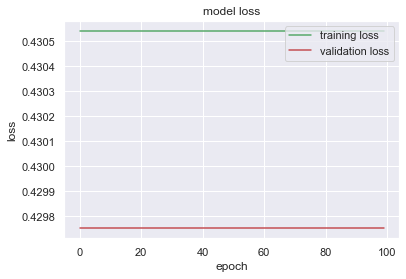

In [34]:
# ===================================================================================
#                                  Loss History Plot
# ===================================================================================

plt.title('model loss')
plt.plot(history.history['loss'], '-g', label = 'training loss')
plt.plot(history.history['val_loss'], '-r', label = 'validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

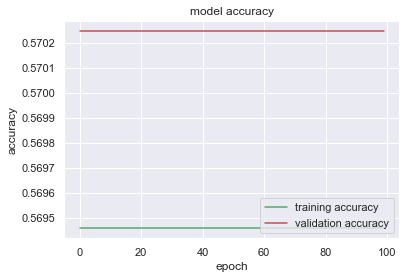

In [35]:
# ===================================================================================
#                                Accuracy History Plot
# ===================================================================================

plt.title('model accuracy')
plt.plot(history.history['accuracy'], '-g', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], '-r', label = 'validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()